In [1]:
#description: this program uses annual returns and annual risks to crerate or build a portfolio

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import math

In [3]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 4, 24), end=datetime(2022, 12, 21)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE", "Meta","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,Meta,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,
2022-12-14,366.739990,143.210007,95.309998,68.930000,21.049999,397.574341,317.829987,188.250000,146.669998,NaN,360.380005,106.459999,111.449997,121.589996,309.290009,257.220001
2022-12-15,356.989990,136.500000,91.199997,66.529999,20.580000,387.848999,290.410004,183.720001,145.360001,NaN,349.829987,105.440002,108.510002,116.150002,301.910004,249.009995
2022-12-16,357.230011,134.509995,90.860001,65.410004,20.799999,383.269989,290.709991,184.699997,142.750000,NaN,346.350006,104.699997,105.949997,119.430000,300.000000,244.690002
2022-12-19,356.329987,132.369995,89.150002,64.589996,19.920000,380.019989,288.299988,185.679993,142.800003,NaN,344.609985,105.169998,103.050003,114.480003,300.029999,240.449997
2022-12-20,353.730011,132.300003,89.629997,65.050003,20.260000,380.540009,288.190002,188.289993,144.050003,NaN,344.489990,106.690002,103.209999,117.089996,302.000000,241.800003


In [4]:
#calculate and show the simple daily returns
daily_simple_returns=d.pct_change(1)
daily_simple_returns

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,Meta,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,
2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-24,-0.006357,0.028869,0.002351,0.005009,0.014894,0.013939,-0.004008,-0.063598,0.007080,0.031586,0.011140,0.006444,0.011677,0.026684,0.004794,0.018259
2020-04-27,-0.014321,0.000707,-0.002681,0.005518,0.220126,0.014419,-0.008494,-0.002326,-0.008807,0.043841,0.036949,0.004802,0.011316,-0.013521,0.005040,-0.002865
2020-04-28,-0.016629,-0.016209,-0.033083,-0.017348,-0.030928,-0.004599,-0.041649,0.020361,-0.002338,-0.040333,0.018906,0.023441,-0.006378,-0.024480,-0.001814,-0.024361
2020-04-29,0.016854,0.032845,0.087390,-0.033327,0.070922,0.026178,0.019959,0.058644,-0.034375,0.079889,0.016149,0.055370,-0.008221,0.061670,0.013307,0.044874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,0.016548,-0.015536,-0.005634,-0.037962,0.002381,-0.006394,-0.007835,0.005985,-0.005560,0.000000,-0.022539,-0.007366,-0.012406,0.011985,-0.009733,0.001168
2022-12-15,-0.026586,-0.046854,-0.043122,-0.034818,-0.022328,-0.024462,-0.086272,-0.024064,-0.008932,0.000000,-0.029275,-0.009581,-0.026379,-0.044740,-0.023861,-0.031918
2022-12-16,0.000672,-0.014579,-0.003728,-0.016834,0.010690,-0.011806,0.001033,0.005334,-0.017955,0.000000,-0.009948,-0.007018,-0.023592,0.028239,-0.006326,-0.017349


In [5]:
#Calculate and show the annual returns
annual_returns=daily_simple_returns.mean()*252
annual_returns

DPZ      0.036555
AAPL     0.305516
GOOG     0.177240
AMD      0.194227
GME      2.507644
SPY      0.151110
NFLX    -0.007990
BA       0.236765
WMT      0.083620
TWTR     0.374958
GS       0.323876
XOM      0.463101
NKE      0.128145
Meta    -0.054208
BRK-B    0.203391
MSFT     0.181700
dtype: float64

In [6]:
#calculate and show the anual risks
annual_risks=daily_simple_returns.std()*math.sqrt(252)
annual_risks

DPZ      0.295427
AAPL     0.325437
GOOG     0.315436
AMD      0.525731
GME      1.861899
SPY      0.194062
NFLX     0.513427
BA       0.490951
WMT      0.220383
TWTR     0.509953
GS       0.305477
XOM      0.361226
NKE      0.335589
Meta     0.476325
BRK-B    0.203025
MSFT     0.292973
dtype: float64

In [7]:
#Short the data in descending order
sorted_annualized_returns=annual_returns.sort_values(ascending=False)
sorted_annualized_returns

GME      2.507644
XOM      0.463101
TWTR     0.374958
GS       0.323876
AAPL     0.305516
BA       0.236765
BRK-B    0.203391
AMD      0.194227
MSFT     0.181700
GOOG     0.177240
SPY      0.151110
NKE      0.128145
WMT      0.083620
DPZ      0.036555
NFLX    -0.007990
Meta    -0.054208
dtype: float64

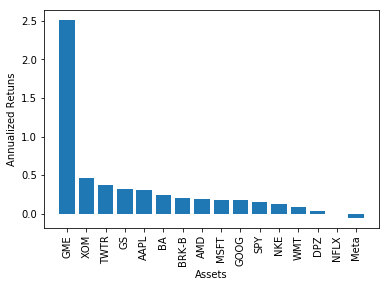

In [8]:
#plot the sorted annualized returns
plt.bar(sorted_annualized_returns.index,sorted_annualized_returns)
plt.ylabel('Annualized Retuns')
plt.xlabel('Assets')
plt.xticks(rotation=90);

In [9]:
#create a dataframe to store the annual returns,annual riskes, and the company ticker symbol and create a new column for the ratio
df2=pd.DataFrame()
df2['Expected Annual Returns']=annual_returns
df2['Expected Annual Risk']=annual_risks
df2['Company Tickers']=annual_risks.index
df2['Ratio']=df2['Expected Annual Returns']/df2['Expected Annual Risk']
#show The data sorted in descending order for the exprctrf annual returns
df2.sort_values(by='Ratio',axis=0,ascending=False,inplace=False)

,Expected Annual Returns,Expected Annual Risk,Company Tickers,Ratio
GME,2.507644,1.861899,GME,1.346821
XOM,0.463101,0.361226,XOM,1.282026
GS,0.323876,0.305477,GS,1.060232
BRK-B,0.203391,0.203025,BRK-B,1.001799
AAPL,0.305516,0.325437,AAPL,0.938787
SPY,0.151110,0.194062,SPY,0.778666
TWTR,0.374958,0.509953,TWTR,0.735279
MSFT,0.181700,0.292973,MSFT,0.620193
GOOG,0.177240,0.315436,GOOG,0.561890
BA,0.236765,0.490951,BA,0.482258


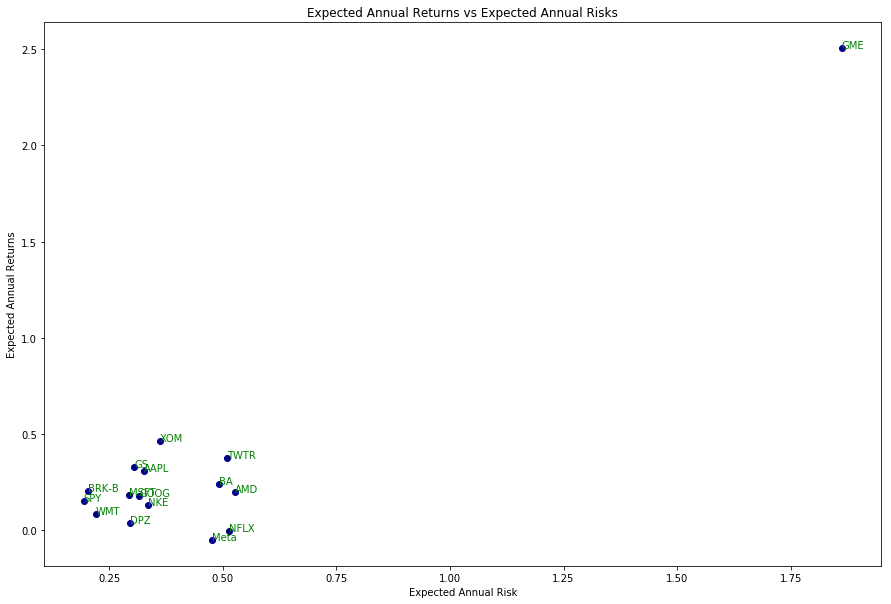

In [10]:
#Visually show the expected annual returns vs the expectedf annual risks
fig,ax=plt.subplots(figsize=(15,10))
plt.title('Expected Annual Returns vs Expected Annual Risks')
ax.scatter(df2['Expected Annual Risk'],df2['Expected Annual Returns'],c='DarkBlue')
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')

#Annotate the points on the plot
for idex,row in df2.iterrows():
    ax.annotate(row['Company Tickers'],(row['Expected Annual Risk'],row['Expected Annual Returns']),color='green')

In [11]:
#show an example of an assets that has a higher return and a lower risk than another assets(e.g. AMZN)
row='GOOG'
df2.loc[(df2['Expected Annual Returns']>df2['Expected Annual Returns'][row]) & (df2['Expected Annual Risk']<df2['Expected Annual Risk'][row])]

,Expected Annual Returns,Expected Annual Risk,Company Tickers,Ratio
GS,0.323876,0.305477,GS,1.060232
BRK-B,0.203391,0.203025,BRK-B,1.001799
MSFT,0.181700,0.292973,MSFT,0.620193


In [12]:
#Gather a list of stock tickers or symbols that have a lower return and more risk than another asset in this data set
remove_asset_list=[]
for ticker in df2['Company Tickers'].values:
    no_better_assets_exists=df2.loc[(df2['Expected Annual Returns']>df2['Expected Annual Returns'][ticker]) & (df2['Expected Annual Risk']<df2['Expected Annual Risk'][ticker])].empty
    if no_better_assets_exists==False:
        remove_asset_list.append(ticker) 
#Show the stock tickers that have a lower return and more risk than another asset in this data set
remove_asset_list

['DPZ',
 'AAPL',
 'GOOG',
 'AMD',
 'NFLX',
 'BA',
 'WMT',
 'TWTR',
 'NKE',
 'Meta',
 'MSFT']

In [13]:
#Show the Asssets that have the highest returns and lowest risk in this data set
df2.drop(remove_asset_list,inplace=True)
df2

,Expected Annual Returns,Expected Annual Risk,Company Tickers,Ratio
GME,2.507644,1.861899,GME,1.346821
SPY,0.151110,0.194062,SPY,0.778666
GS,0.323876,0.305477,GS,1.060232
XOM,0.463101,0.361226,XOM,1.282026
BRK-B,0.203391,0.203025,BRK-B,1.001799


In [14]:
#the calculation for the new new portfolio
assets=df2.index
num_assets=len(assets)

In [15]:
num_assets

5

In [16]:
#Calculate the new simple daily return
daily_simple_returns=d[assets].pct_change(1)
#Calculate the new annual returns
annual_returns=daily_simple_returns.mean()*252

In [17]:
#Create weights
n=1.0/float(num_assets)
weights=[n]*num_assets
weights=np.array(weights)

#show the weigts
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [18]:
#calculate and show the covariannce matrix
cov_matrix_annual=daily_simple_returns.cov()*252
cov_matrix_annual

,GME,SPY,GS,XOM,BRK-B
GME,3.466667,0.045127,0.063910,0.050857,0.032276
SPY,0.045127,0.037660,0.039658,0.030811,0.029101
GS,0.063910,0.039658,0.093316,0.056364,0.042882
XOM,0.050857,0.030811,0.056364,0.130484,0.040099
BRK-B,0.032276,0.029101,0.042882,0.040099,0.041219


In [19]:
#Calculate and show the annual variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.18526071255078141

In [20]:
#Calculate and show the portfolio volatility of risk
port_volatility=np.sqrt(port_variance)
port_volatility

0.43041922883484357

In [21]:
#calculate and show the expected returns
port_returns_expected=np.sum(weights*annual_returns)
#show the expected returns as percentage
print(str(round(port_returns_expected*100,2))+'%')

72.98%
